In [3]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import copy

# Shuffle Data

In [194]:
data = pd.read_csv('final_train_al.csv')
data_used = data.sample(frac = 1).drop('Unnamed: 0',axis=1)
data_used = data_used.reset_index(drop = True)

In [196]:
x = data_used.drop('class',axis = 1)
y = data_used['class']

kf = KFold(n_splits = 5)
kappa = 0
for train_index, test_index in kf.split(x):
    print('train_index', train_index, 'test_index', test_index)
    train_X, train_y = x.iloc[train_index], y[train_index]
    test_X, test_y = x.iloc[test_index], y[test_index]
    classifier = XGBClassifier(max_depth = 20, n_estimators = 200,objective = 'multi:softmax',num_class = 3)
    classifier.fit(train_X,train_y)
    y_predict = classifier.predict(test_X)
    kappa += cohen_kappa_score(test_y,y_predict)
    print(kappa/5)

train_index [ 2712  2713  2714 ... 13553 13554 13555] test_index [   0    1    2 ... 2709 2710 2711]
0.1483496616685341
train_index [    0     1     2 ... 13553 13554 13555] test_index [2712 2713 2714 ... 5420 5421 5422]
0.29484887570648777
train_index [    0     1     2 ... 13553 13554 13555] test_index [5423 5424 5425 ... 8131 8132 8133]
0.44117077428330287
train_index [    0     1     2 ... 13553 13554 13555] test_index [ 8134  8135  8136 ... 10842 10843 10844]
0.5816256209428714
train_index [    0     1     2 ... 10842 10843 10844] test_index [10845 10846 10847 ... 13553 13554 13555]
0.7231722530611654


# Fit Model

In [197]:
classifier.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

# Extract Important Feature

In [198]:
feature_imp = pd.Series(classifier.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp.head(20)

blogger_fans           0.243997
blogger_tag            0.108652
blogger_posts          0.077445
video                  0.072116
picture                0.060637
blogger_gender         0.051269
no_related_accounts    0.049246
blogger_follows        0.048905
post                   0.042148
no_topics              0.035231
brand_fans             0.031114
brand_posts            0.026384
produc_score           0.025947
brand_follows          0.025913
brand_hot_topic        0.025783
brand_gender           0.025519
product_price          0.024874
product_popularity     0.024820
dtype: float32

No handles with labels found to put in legend.


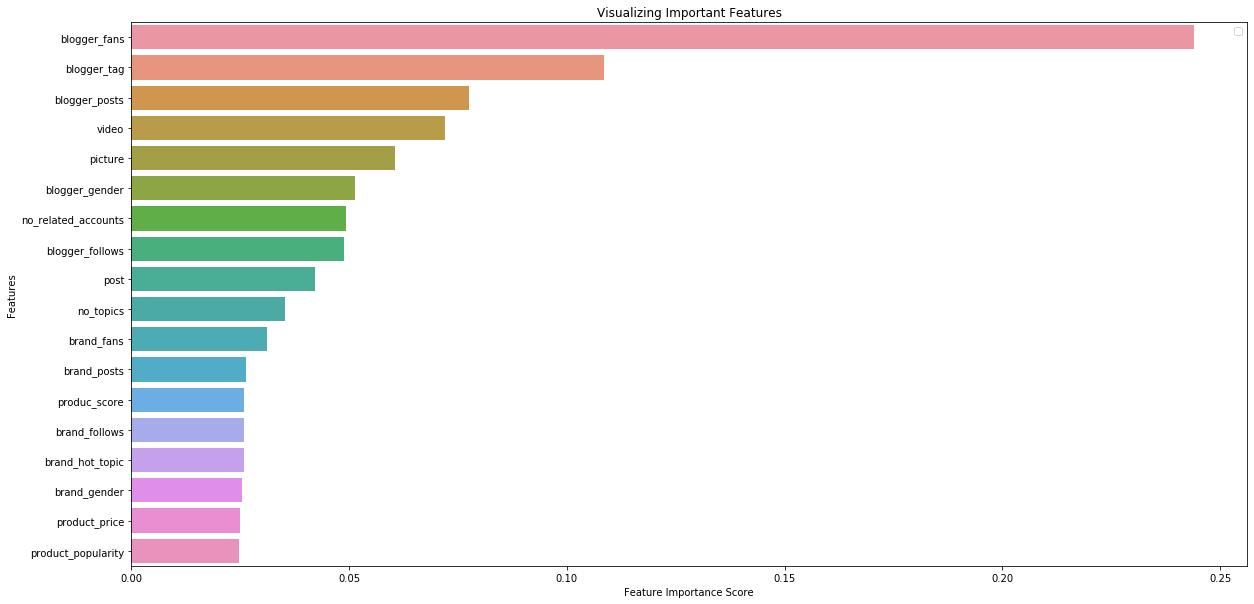

In [289]:
plt.figure(figsize = (20,10)) 

# create a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.savefig('import.png')

# Prediction

In [200]:
test_data = pd.read_csv('test_data_blogger.csv')

In [201]:
test_data

,blogger_name,blogger_id,blogger_gender,blogger_region,blogger_tag,blogger_follows,blogger_fans,blogger_posts
0,小米苏酥,87768787,female,海外,NaN,594,510000,10000
1,萌大雨YUYU,1011269330,female,其他,"时尚达人,知名美妆博主,时尚美妆视频自媒体",57,3870000,1343
2,missfaye,1032937413,female,北京,"时尚达人,知名时尚博主,微博尤物志合作达人",1467,800000,20000
3,kittywenny,1036701494,female,上海,"资深时尚美容达人,微博尤物志合作达人,微博vlog博主,微博签约自媒体",986,1390000,7502
4,羽晗winnie,1039619890,female,北京,"知名旅行玩家美食达人,微博vlog博主,知名时尚博主,头条文章作者,微博签约自媒体",321,3940000,1195
5,潘朵拉Pandore,1053409732,female,上海,"美妆博主,时尚达人,头条文章作者",2805,1080000,10000
6,Etsuna悦奈inTokyo,1053701534,female,海外,"知名时尚博主,时尚达人,时尚美妆视频自媒体",87,1950000,10000
7,ZY大暖,1066162524,male,浙江,知名时尚博主,65,610000,4045
8,mandy_014,1075376185,female,广东,"时尚达人,广州市天盈化妆品有限公司市场策划主管,知名美妆博主,头条文章作者",2237,2340000,4009
9,壹十七少,1087289147,female,湖北,"微博vlog博主,时尚博主",759,330000,1068


In [4]:
test_data_brand = pd.read_csv('test_data_brand.csv')

In [5]:
test_data_brand

,brand_uid,brand_blog_name,brand_gender,brand_region,brand_tag,brand_follows,brand_fans,brand_posts,brand_name,brand_hot_topic,product,product_price,product_popularity,produc_score
0,5619422243,井田志Gridnote,male,北京,原本一生（北京）商业有限公司,363,3487,494,canmake/井田,1,CANMAKE14腮红,98,275712,4.9
1,6079473403,SUQQU_official,female,海外,"""equipe,LTD""",217,490000,781,SUQQU,1,SUQQU眉粉,599,2581,4.9
2,6320994446,THREE,female,海外,株式会社ACRO,14,80000,624,three,0,THREE01腮红,379,4397,4.7
3,2040921197,宝拉珍选PaulasChoice,female,上海,美国宝拉珍选化妆品官方微博,271,260000,7286,Paula‘s Choice/宝拉珍选,0,宝拉珍选大地之源洁面,328,151674,4.7
4,1791154147,红门雅顿,female,海外,伊丽莎白雅顿官方微博,268,250000,10000,Elizabeth Arden/雅顿,0,雅顿铂粹御肤精华,790,194904,4.8
5,5619422243,井田志Gridnote,male,北京,原本一生（北京）商业有限公司,363,3487,494,canmake/井田,1,砍妹眉粉,88,8403,4.7
6,5539441126,TFBOYS_FanClub,male,北京,"时代峰峻TF家族偶像组合TFBOYS, FanClub, 官方微博",48,2790000,2808,FANCL,0,FANCL卸妆油,398,493,4.9
7,2075794183,芮谜Rimmel,female,海外,芮谜Rimmel品牌官方微博,109,40000,1767,rimmel,0,RIMMEL眼影,99,1284,4.9
8,2460538310,Curel珂润,female,海外,花王Curel珂润官方微博,149,60000,6928,Curel/珂润,0,珂润防晒乳,205,28510,4.9
9,1793598474,雅诗兰黛,female,上海,雅诗兰黛,158,3500000,9027,Estee Lauder/雅诗兰黛,1,雅诗兰黛腮红,450,18172,4.9


In [8]:
test_brand = test_data_brand.iloc[14:15]

In [9]:
test_brand

,brand_uid,brand_blog_name,brand_gender,brand_region,brand_tag,brand_follows,brand_fans,brand_posts,brand_name,brand_hot_topic,product,product_price,product_popularity,produc_score
14,1689230932,Origins悦木之源,female,上海,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9


In [238]:
test_data_final = copy.deepcopy(test_data)
for i in test_brand.columns:
    test_data_final[i] = test_brand[i][14]

In [239]:
test_data_final

,blogger_name,blogger_id,blogger_gender,blogger_region,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_uid,brand_blog_name,...,brand_tag,brand_follows,brand_fans,brand_posts,brand_name,brand_hot_topic,product,product_price,product_popularity,produc_score
0,小米苏酥,87768787,female,海外,NaN,594,510000,10000,1689230932,Origins悦木之源,...,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9
1,萌大雨YUYU,1011269330,female,其他,"时尚达人,知名美妆博主,时尚美妆视频自媒体",57,3870000,1343,1689230932,Origins悦木之源,...,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9
2,missfaye,1032937413,female,北京,"时尚达人,知名时尚博主,微博尤物志合作达人",1467,800000,20000,1689230932,Origins悦木之源,...,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9
3,kittywenny,1036701494,female,上海,"资深时尚美容达人,微博尤物志合作达人,微博vlog博主,微博签约自媒体",986,1390000,7502,1689230932,Origins悦木之源,...,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9
4,羽晗winnie,1039619890,female,北京,"知名旅行玩家美食达人,微博vlog博主,知名时尚博主,头条文章作者,微博签约自媒体",321,3940000,1195,1689230932,Origins悦木之源,...,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9
5,潘朵拉Pandore,1053409732,female,上海,"美妆博主,时尚达人,头条文章作者",2805,1080000,10000,1689230932,Origins悦木之源,...,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9
6,Etsuna悦奈inTokyo,1053701534,female,海外,"知名时尚博主,时尚达人,时尚美妆视频自媒体",87,1950000,10000,1689230932,Origins悦木之源,...,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9
7,ZY大暖,1066162524,male,浙江,知名时尚博主,65,610000,4045,1689230932,Origins悦木之源,...,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9
8,mandy_014,1075376185,female,广东,"时尚达人,广州市天盈化妆品有限公司市场策划主管,知名美妆博主,头条文章作者",2237,2340000,4009,1689230932,Origins悦木之源,...,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9
9,壹十七少,1087289147,female,湖北,"微博vlog博主,时尚博主",759,330000,1068,1689230932,Origins悦木之源,...,全球知名高效天然植物护肤品牌,167,390000,10000,origins/悦木之源,0,悦木之源炭瓷膜,200,278952,4.9


In [269]:
test_data_processed = test_data_final.drop(['blogger_name','blogger_id','blogger_region','brand_uid',
              'brand_blog_name','brand_region','brand_tag','brand_name',
              'product'], axis = 1)

In [270]:
test_data_processed

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,product_price,product_popularity,produc_score
0,female,NaN,594,510000,10000,female,29,591,285,0,79,8840,4.9
1,female,"时尚达人,知名美妆博主,时尚美妆视频自媒体",57,3870000,1343,female,29,591,285,0,79,8840,4.9
2,female,"时尚达人,知名时尚博主,微博尤物志合作达人",1467,800000,20000,female,29,591,285,0,79,8840,4.9
3,female,"资深时尚美容达人,微博尤物志合作达人,微博vlog博主,微博签约自媒体",986,1390000,7502,female,29,591,285,0,79,8840,4.9
4,female,"知名旅行玩家美食达人,微博vlog博主,知名时尚博主,头条文章作者,微博签约自媒体",321,3940000,1195,female,29,591,285,0,79,8840,4.9
5,female,"美妆博主,时尚达人,头条文章作者",2805,1080000,10000,female,29,591,285,0,79,8840,4.9
6,female,"知名时尚博主,时尚达人,时尚美妆视频自媒体",87,1950000,10000,female,29,591,285,0,79,8840,4.9
7,male,知名时尚博主,65,610000,4045,female,29,591,285,0,79,8840,4.9
8,female,"时尚达人,广州市天盈化妆品有限公司市场策划主管,知名美妆博主,头条文章作者",2237,2340000,4009,female,29,591,285,0,79,8840,4.9
9,female,"微博vlog博主,时尚博主",759,330000,1068,female,29,591,285,0,79,8840,4.9


In [273]:
blg_gender = []

for i in test_data_processed['blogger_gender'].tolist():
    if i == 'female':
        blg_gender.append(1)
    else:
        blg_gender.append(0)
        
test_data_processed['blogger_gender'] = blg_gender

In [274]:
brd_gender = []

for i in test_data_processed['brand_gender'].tolist():
    if i == 'female':
        brd_gender.append(1)
    else:
        brd_gender.append(0)
        
test_data_processed['brand_gender'] = brd_gender

In [275]:
tag_num = []

for i in test_data_processed['blogger_tag'].tolist():
    if pd.isnull(i):
        tag_num.append(0)
        continue
    lst = i.split(',')
    tag_num.append(len(lst))
    
test_data_processed['blogger_tag'] = tag_num

In [276]:
test_data_processed['post'] = 118
test_data_processed['picture'] = 6
test_data_processed['video'] = 1
test_data_processed['no_topics'] = 1
test_data_processed['no_related_accounts'] = 0

In [281]:
cols = ['blogger_gender', 'blogger_tag', 'blogger_follows', 'blogger_fans', 'blogger_posts', 'brand_gender', 'brand_follows', 'brand_fans', 'brand_posts', 'brand_hot_topic', 'post', 'picture', 'video', 'no_topics', 'no_related_accounts', 'product_price', 'product_popularity', 'produc_score']
test_data_processed = test_data_processed.ix[:, cols]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [282]:
test_predict = classifier.predict(test_data_processed)
test_data_final['class'] = test_predict

In [285]:
test_data_final['post'] = 118
test_data_final['picture'] = 6
test_data_final['video'] = 1
test_data_final['no_topics'] = 1
test_data_final['no_related_accounts'] = 0

In [286]:
test_data_final
test_data_final.to_csv('prediction.csv', encoding = 'utf-8-sig')

,blogger_name,blogger_id,blogger_gender,blogger_region,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_uid,brand_blog_name,...,product,product_price,product_popularity,produc_score,class,post,picture,video,no_topics,no_related_accounts
0,小米苏酥,87768787,female,海外,NaN,594,510000,10000,6530990015,Cezanne倩诗丽,...,CEZANNE腮红,79,8840,4.9,1,118,6,1,1,0
1,萌大雨YUYU,1011269330,female,其他,"时尚达人,知名美妆博主,时尚美妆视频自媒体",57,3870000,1343,6530990015,Cezanne倩诗丽,...,CEZANNE腮红,79,8840,4.9,0,118,6,1,1,0
2,missfaye,1032937413,female,北京,"时尚达人,知名时尚博主,微博尤物志合作达人",1467,800000,20000,6530990015,Cezanne倩诗丽,...,CEZANNE腮红,79,8840,4.9,1,118,6,1,1,0
3,kittywenny,1036701494,female,上海,"资深时尚美容达人,微博尤物志合作达人,微博vlog博主,微博签约自媒体",986,1390000,7502,6530990015,Cezanne倩诗丽,...,CEZANNE腮红,79,8840,4.9,0,118,6,1,1,0
4,羽晗winnie,1039619890,female,北京,"知名旅行玩家美食达人,微博vlog博主,知名时尚博主,头条文章作者,微博签约自媒体",321,3940000,1195,6530990015,Cezanne倩诗丽,...,CEZANNE腮红,79,8840,4.9,0,118,6,1,1,0
5,潘朵拉Pandore,1053409732,female,上海,"美妆博主,时尚达人,头条文章作者",2805,1080000,10000,6530990015,Cezanne倩诗丽,...,CEZANNE腮红,79,8840,4.9,0,118,6,1,1,0
6,Etsuna悦奈inTokyo,1053701534,female,海外,"知名时尚博主,时尚达人,时尚美妆视频自媒体",87,1950000,10000,6530990015,Cezanne倩诗丽,...,CEZANNE腮红,79,8840,4.9,0,118,6,1,1,0
7,ZY大暖,1066162524,male,浙江,知名时尚博主,65,610000,4045,6530990015,Cezanne倩诗丽,...,CEZANNE腮红,79,8840,4.9,1,118,6,1,1,0
8,mandy_014,1075376185,female,广东,"时尚达人,广州市天盈化妆品有限公司市场策划主管,知名美妆博主,头条文章作者",2237,2340000,4009,6530990015,Cezanne倩诗丽,...,CEZANNE腮红,79,8840,4.9,0,118,6,1,1,0
9,壹十七少,1087289147,female,湖北,"微博vlog博主,时尚博主",759,330000,1068,6530990015,Cezanne倩诗丽,...,CEZANNE腮红,79,8840,4.9,1,118,6,1,1,0
